# Assignment 3: Classification and Feature Engineering

## Harsh Sanjay Roniyar - 22B3942

---
Assignment Demo Link : https://drive.google.com/drive/folders/1eBgb24kiaH071tBXQXg2JnvlIpImU8qB?usp=sharing

--- 

### My Code Structure
- For functions (if any), I have added a special description of the input parameters and the return values for the corresponding function. This serves two purposes, helps me in code readability and ease of understanding for the viewer.
- All libraries used for the questions have been imported at the start of the main code (except when explicitly asked in the specific question).
- For the code blocks or lines, where a reference is not cited implies that I have done that part completely out of my understanding and previous knowledge.
- For the referenced parts, the list of references is the last cell of this notebook.
- Additionally, for lines without comments imply that either it is part of the base code or is a repetitive chunk across cells.

---

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### `sklearn` modules

In [108]:
from sklearn.preprocessing import LabelEncoder # for encoding categorical variables
from sklearn.preprocessing import StandardScaler # for standardizing numerical variables

from sklearn.model_selection import train_test_split # for splitting the data into train and test sets
from sklearn.model_selection import cross_val_score # for cross validation

from sklearn.svm import SVC # for Support Vector Classifier
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning
from sklearn.neural_network import MLPClassifier # for Multi-layer Perceptron Classifier
from sklearn.ensemble import RandomForestClassifier # for Random Forest Classifier
from sklearn.linear_model import LogisticRegression # for Logistic Regression Classifier

from sklearn.inspection import permutation_importance # for feature importance

from sklearn.feature_selection import RFECV, RFE # for feature selection

#### `pytorch` modules

In [106]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

### Some base configuration for the libraries

In [3]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

## Objective 1:

### Q1. Exploratory Data Analysis (EDA)

In [68]:
df = pd.read_csv('bank.csv')

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [71]:
# Check for missing data
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [72]:
df.describe() # summary statistics

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [73]:
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['deposit'] = le.fit_transform(df['deposit'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [74]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


At this point, we have performed Label Encoding on the categorical variables in the dataset. The updated dataframe `df` now has normalized mean and std. deviation.

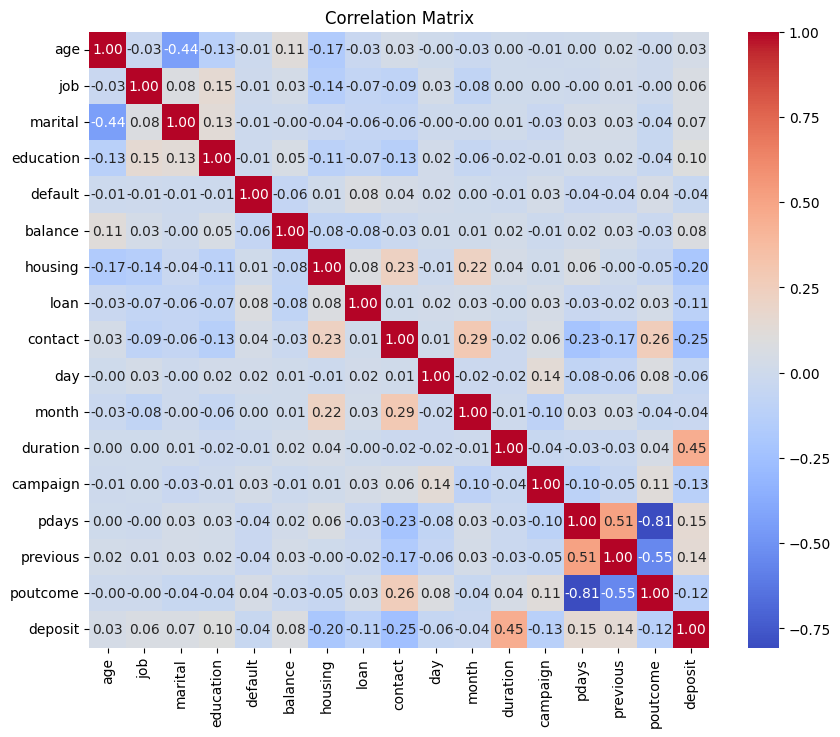

In [12]:
# Correlation analysis for numeric data
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

deposit
0    5873
1    5289
Name: count, dtype: int64


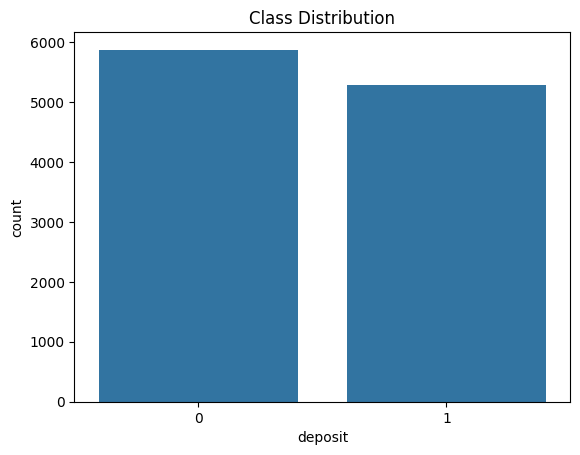

In [13]:
# Check class balance
class_balance = df['deposit'].value_counts()
print(class_balance)

# Visualization
sns.countplot(data=df, x='deposit')
plt.title("Class Distribution")
plt.show()

#### a.

In general:
- **Usable Variables**: Variables with significant correlations with the target variable `deposit` (i.e., correlations not close to zero) are likely to be more useful. In our case `duration` shows a relatively high positive correlation with `deposit`, indicating that longer call durations might be associated with successful deposits. Variables such as `balance` and `housing` also show moderate correlations with `deposit`.
  
- **Less Usable Variables**: Variables that have low or close-to-zero correlations with `deposit`, such as `age`, `month`, and `default`, might not provide significant predictive value in the model. These variables can be excluded to simplify the model.

#### b.

Yes, some significant correlations exist:
- `pdays` and `previous` have a strong positive correlation of around **0.51**, which indicates that the number of days since the client was last contacted and the number of previous contacts may be related.
- `poutcome` and `pdays` also have a notable negative correlation (**-0.81**), suggesting a relationship between the outcome of the previous marketing campaign and the time since the last contact.
- `duration` and `deposit` have a moderate positive correlation (**0.45**), indicating that longer call durations are somewhat associated with deposit success.

#### c.

From the class distribution, we can see that the counts for both classes (0 and 1 in the deposit column) appear to be close, with only a slight difference between the two. Thus we do not have a significant class imbalance issue, hence we won’t necessarily need to use class balancing techniques.

#### d.

Since `deposit` is the target variable, we will use both classes:
- **Class 1**: Deposits made ("yes")
- **Class 0**: No deposits made ("no")

These classes represent the two possible outcomes we want to predict. Both classes will be included in the model.

`[2]`

In [15]:
# Not useful columns because they have very little to no correlation with any variable (specifically the target variable)
df_updated = df.drop(['age', 'month', 'default'], axis=1) # drop columns

### Q2. Evaluation Metrics

In [16]:
# Defining evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Accuracy: Measures overall correct predictions
# F1 score: Useful for imbalanced classes
# AUC: Measures model's ability to distinguish between classes

**Metrics Chosen**:
1. Accuracy: Would help in measuring the overall correct predictions
2. F1 Score: Helps in balancing Precision and Recall which helps in evaluating for imbalanced classes
3. AUC-ROC: It measures the model's ability to distinguish between classes

### Q3. Feature Selection and Preprocessing

In [18]:
# Normalizing continuous variables
scaler = StandardScaler()
df_updated[['balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df_updated[['balance', 'duration', 'campaign', 'pdays', 'previous']])

# # Combining discrete variables if necessary (as an example)
# df['job'] = df['job'].replace(['admin.', 'blue-collar'], 'other')

In [20]:
df_updated.describe()

,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,1.116200e+04,11162.000000,11162.000000,11162.000000,11162.000000,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,11162.000000,11162.000000
mean,4.487905,1.199337,1.285164,1.018517e-17,0.473123,0.130801,0.489697,15.658036,8.148134e-17,3.055550e-17,5.092584e-18,-2.037033e-17,2.477782,0.473840
std,3.225132,0.625552,0.749478,1.000045e+00,0.499299,0.337198,0.818724,8.420740,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.002952,0.499338
min,0.000000,0.000000,0.000000,-2.596850e+00,0.000000,0.000000,0.000000,1.000000,-1.065918e+00,-5.541683e-01,-4.811841e-01,-3.632598e-01,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-4.360996e-01,0.000000,0.000000,0.000000,8.000000,-6.741146e-01,-5.541683e-01,-4.811841e-01,-3.632598e-01,2.000000,0.000000
50%,4.000000,1.000000,1.000000,-3.033975e-01,0.000000,0.000000,0.000000,15.000000,-3.370484e-01,-1.867854e-01,-4.811841e-01,-3.632598e-01,3.000000,0.000000
75%,7.000000,2.000000,2.000000,5.564233e-02,1.000000,0.000000,1.000000,22.000000,3.572503e-01,1.805976e-01,-2.811903e-01,7.305850e-02,3.000000,1.000000
max,11.000000,2.000000,3.000000,2.470351e+01,1.000000,1.000000,2.000000,31.000000,1.010912e+01,2.222358e+01,7.380638e+00,2.494320e+01,3.000000,1.000000


#### a.
We should normalize the continuous variables since it ensures that each feature contributes equally to the model's performance and helps in faster convergence during training.

#### b.
Similarly for discrete variables, combining discrete variables can help in reducing the dimensionality and improving the model's performance. For example, we can group similar job categories together.

#### c.
From the above data summary, we can make some key observations on the relevance of each variable:

1. `balance`:
   - The large range (from -2.60 to 24.70) and the fact that the mean is very close to zero suggest that `balance` might contain extreme values or outliers, which could indicate noise.

2. `duration`:
   - Similar to `balance`, `duration` has a large range (from -1.07 to 10.11) and a mean close to zero. This could indicate a high variance in call durations, possibly from data entry inconsistencies or true client variability. 
   - Since this variable directly relates to engagement (as call duration can impact deposit outcomes), it’s likely relevant but may need transformation (e.g., scaling or capping).

3. `campaign`:
   - With a maximum value of 22.22, this variable also may contain outliers representing excessive contact attempts. Most campaigns likely have a much lower count, so the large maximum may skew results.

**Conclusion**:
Variables like `balance`, `duration` and `campaign` may contain noise or outliers, which should be handled carefully. These variables might be relevant but will require preprocessing (e.g., normalization, handling outliers) to improve their quality and impact on model performance.

`[3]`

### Q4:

In [24]:
# Create train and test data (ensure balanced classes)
X = df_updated.drop('deposit', axis=1)
y = df_updated['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Yes, there should be an attempt to balance the distribution in train and test split of the dataset. stratify=y ensures that the class balance is maintained in the train and test data by splitting the data in a way that the proportion of classes in the train and test data is the same as the original data. 

Instead, if we wanted to balance the class distribution, we could do the following:

This can be achieved through various techniques such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE (Synthetic Minority Over-sampling Technique). Balancing the classes helps in improving the model's performance and ensures that the model does not become biased towards the majority class.

Balancing the class distribution should be done before splitting the dataset into training and testing sets to ensure that both sets are balanced. Here is the code to achieve this using the `SMOTE` technique:

```python
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)
```

`[1]`

### Q5.

#### a. RBF Kernel SVM

In [25]:
# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']} # hyperparameters to tune
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5, scoring='accuracy') # 5-fold cross-validation with accuracy as scoring metric
grid.fit(X_train, y_train) # fit the model

# Best parameters
print("Best parameters for SVM:", grid.best_params_)

Best parameters for SVM: {'C': 10, 'gamma': 'scale'}


#### b. Neural Network

In [27]:
# Hyperparameter tuning for neural network
param_grid_nn = {'hidden_layer_sizes': [(25,), (50,), (100,)], 'alpha': [0.0001, 0.001, 0.01]} # hidden layer size (x, ) implies x neurons in the single hidden layer
grid_nn = GridSearchCV(MLPClassifier(activation='relu', max_iter=500), param_grid_nn, refit=True, cv=5, scoring='accuracy') # 5-fold cross-validation with accuracy as scoring metric, softmax activation function is default
grid_nn.fit(X_train, y_train)

print("Best parameters for NN:", grid_nn.best_params_)

Best parameters for NN: {'alpha': 0.01, 'hidden_layer_sizes': (25,)}


#### c. Random Forest

In [30]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {'max_depth': [10, 20], 'max_features': ['sqrt', 'log2']}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'log2'}


### Q6.

After tuning, we can analyze feature importance for each model. 

`Note`:

Random Forest provides direct feature importance.
Neural Networks and SVM do not have built-in feature importance, but we can use techniques like Permutation Importance or SHAP values for interpretability.

```python
from sklearn.inspection import permutation_importance
```

`[4]`

In [ ]:
# For SVM
perm_importance_svm = permutation_importance(grid.best_estimator_, X_train, y_train, n_repeats=10, random_state=42)
features_df_svm = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_svm.importances_mean
}).sort_values(by='Importance', ascending=False)

print("SVM Feature Importances:")
print(features_df_svm)

# For Neural Network
perm_importance_nn = permutation_importance(grid_nn.best_estimator_, X_train, y_train, n_repeats=10, random_state=42)
features_df_nn = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_nn.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Neural Network Feature Importances:")
print(features_df_nn)

SVM Feature Importances:
      Feature  Importance
8    duration    0.197351
4     housing    0.029656
10      pdays    0.027275
12   poutcome    0.025253
11   previous    0.019532
6     contact    0.015794
7         day    0.009062
9    campaign    0.007564
3     balance    0.007449
5        loan    0.004083
2   education    0.003661
0         job    0.000870
1     marital    0.000550
Neural Network Feature Importances:
      Feature  Importance
8    duration    0.208588
10      pdays    0.034839
12   poutcome    0.031409
11   previous    0.027749
4     housing    0.024754
6     contact    0.019468
9    campaign    0.010649
3     balance    0.005747
5        loan    0.005260
0         job    0.004531
7         day    0.003110
2   education    0.001562
1     marital    0.000550


In [ ]:
# Get feature importance from Random Forest
feature_importance_rf = grid_rf.best_estimator_.feature_importances_

# Convert to a DataFrame for better readability
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(features_df_rf)

Random Forest Feature Importances:
      Feature  Importance
8    duration    0.497649
3     balance    0.074284
6     contact    0.071184
10      pdays    0.060662
7         day    0.053293
12   poutcome    0.052449
4     housing    0.049496
9    campaign    0.036320
0         job    0.029864
11   previous    0.028432
2   education    0.017490
1     marital    0.016892
5        loan    0.011985


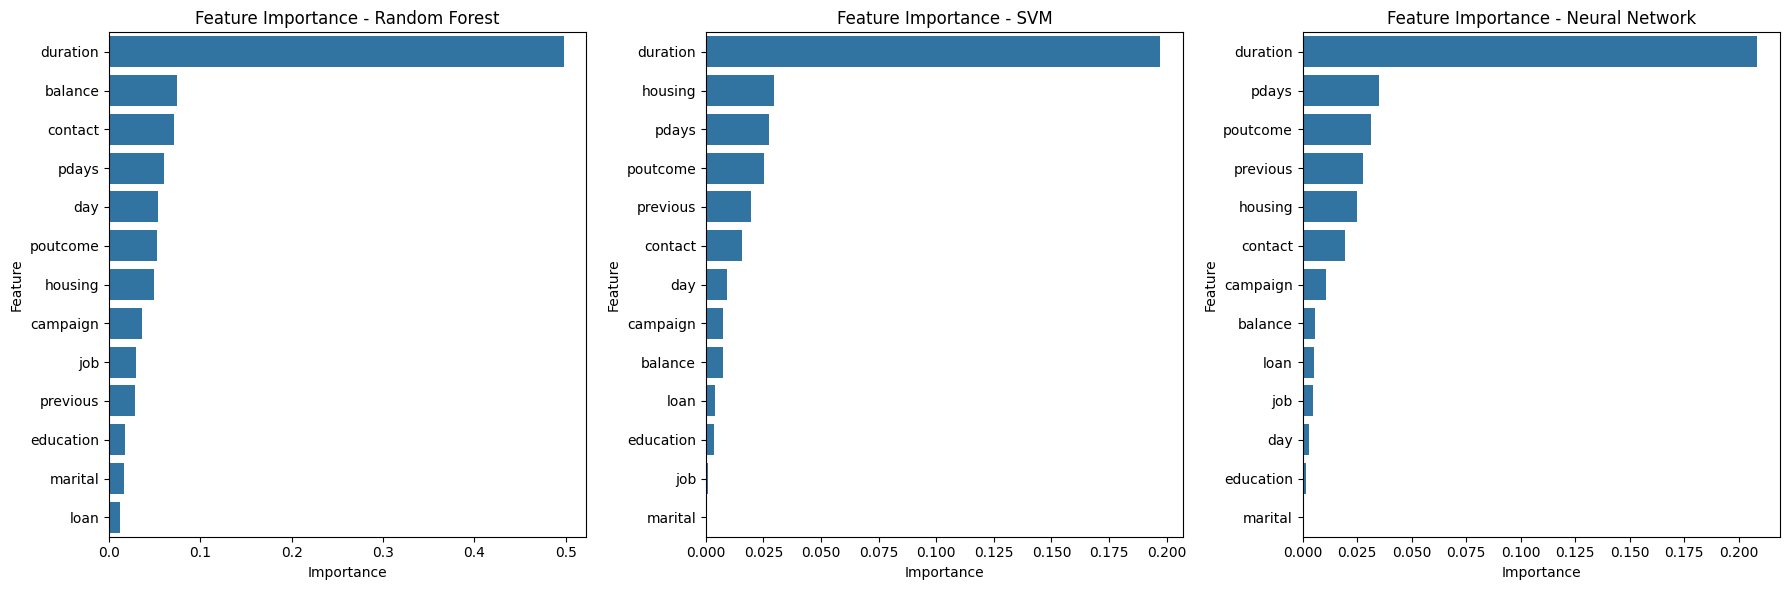

In [40]:
features = X_train.columns
# Plotting feature importance for Random Forest
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=features_df_rf['Importance'], y=features_df_rf['Feature'])
plt.title("Feature Importance - Random Forest")

# Plotting feature importance for SVM
plt.subplot(1, 3, 2)
sns.barplot(x=features_df_svm['Importance'], y=features_df_svm['Feature'])
plt.title("Feature Importance - SVM")

# Plotting feature importance for Neural Network
plt.subplot(1, 3, 3)
sns.barplot(x=features_df_nn['Importance'], y=features_df_nn['Feature'])
plt.title("Feature Importance - Neural Network")

plt.tight_layout()
plt.show()

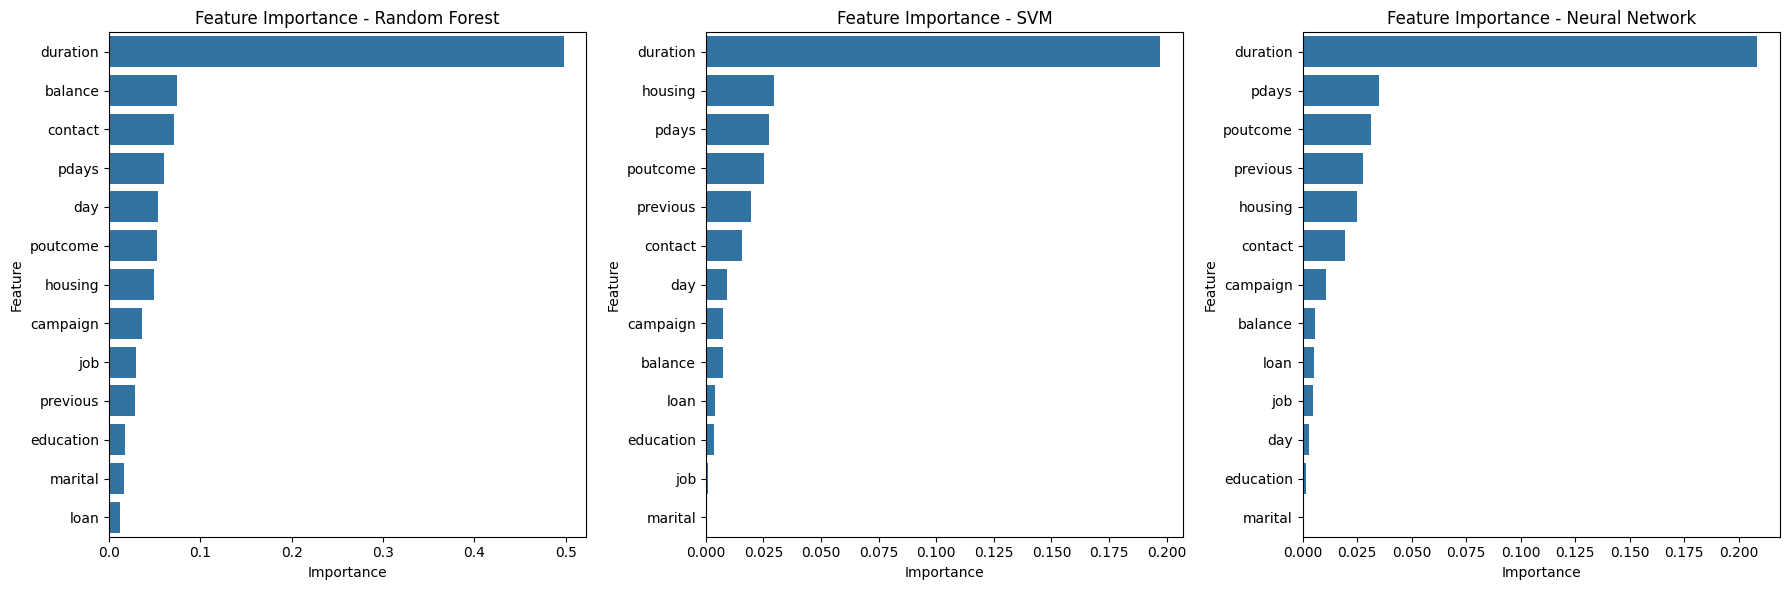

From the feature importance plots for each model (Random Forest, SVM, and Neural Network), we observe the following:

1. The feature `duration` is consistently the most important across all models.

2. Secondary Features:
    - For the **Random Forest** model, features like `balance,` `contact,` and `pdays` also show notable importance, though not as strong as `duration`.
    - In the **SVM** model, `housing,` `pdays,` and `poutcome` are somewhat important, following `duration.`
    - The **Neural Network** model also emphasizes `pdays,` `poutcome,` and `previous` as relatively important features after `duration.`

3. Features like `job,` `education,` `marital,` and `loan` have lower importance across all models, indicating they contribute less to the prediction.

### Q7. 

`[5, 6]`

In [57]:
# Recursive feature elimination using cross-validation for Random Forest
rfecv_rf = RFECV(estimator=grid_rf.best_estimator_, step=1, cv=5, scoring='accuracy')
rfecv_rf.fit(X_train, y_train)
print("Optimal number of features for Random Forest:", rfecv_rf.n_features_)

Optimal number of features for Random Forest: 13


In [65]:
# Function to perform custom RFE
def custom_rfe(model, X, y, step=1, min_features=1, scoring='accuracy', cv=5):
    n_features = X.shape[1]
    feature_indices = np.arange(n_features)
    ranking = np.ones(n_features, dtype=int)  # Track the ranking of features
    scores = []
    
    while len(feature_indices) > min_features:
        # Perform cross-validation with current set of features
        score = cross_val_score(model, X.iloc[:, feature_indices], y, cv=cv, scoring=scoring).mean()
        scores.append(score)
        print(f"Number of features: {len(feature_indices)}, Score: {score}")
        
        # Fit the model to get feature importances or coefficients
        model.fit(X.iloc[:, feature_indices], y)
        
        # Calculate feature importance based on permutation feature importance
        feature_importances = np.zeros(len(feature_indices))
        
        for i, idx in enumerate(feature_indices):
            X_temp = X.iloc[:, np.delete(feature_indices, i)]
            score_temp = cross_val_score(model, X_temp, y, cv=cv, scoring=scoring).mean()
            feature_importances[i] = score - score_temp
        
        # Identify the least important features
        least_important_indices = np.argsort(feature_importances)[:step]
        
        # Update the ranking for the least important features
        ranking[feature_indices[least_important_indices]] = len(feature_indices)
        
        # Remove the least important features from feature indices
        feature_indices = np.delete(feature_indices, least_important_indices)
        
    return ranking, scores

# Custom RFE for SVC with RBF kernel
rbf_svc = SVC(C=10, kernel='rbf', gamma='scale')
ranking_svc, scores_svc = custom_rfe(rbf_svc, X_train, y_train, step=1)

print("RBF SVC feature ranking:", ranking_svc)
print("RBF SVC cross-validation scores:", scores_svc)

# Custom RFE for MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42, hidden_layer_sizes=(25,), alpha=0.01)
ranking_mlp, scores_mlp = custom_rfe(mlp, X_train, y_train, step=1)

print("MLP feature ranking:", ranking_mlp)
print("MLP cross-validation scores:", scores_mlp)

Number of features: 13, Score: 0.8017390798580817
Number of features: 12, Score: 0.8090348758051713
Number of features: 11, Score: 0.8098032854838564
Number of features: 10, Score: 0.812234589412822
Number of features: 9, Score: 0.8130033267715406
Number of features: 8, Score: 0.809932391417077
Number of features: 7, Score: 0.8085236949528264
Number of features: 6, Score: 0.8074993671679351
Number of features: 5, Score: 0.8032754076954017
Number of features: 4, Score: 0.7954676936158918
Number of features: 3, Score: 0.7852283479273827
Number of features: 2, Score: 0.771277206658786
RBF SVC feature ranking: [11 12  9  6  3  8  4 13  1  5  7 10  2]
RBF SVC cross-validation scores: [0.8017390798580817, 0.8090348758051713, 0.8098032854838564, 0.812234589412822, 0.8130033267715406, 0.809932391417077, 0.8085236949528264, 0.8074993671679351, 0.8032754076954017, 0.7954676936158918, 0.7852283479273827, 0.771277206658786]
Number of features: 13, Score: 0.8017390798580818
Number of features: 12, 

**RBF_SVM Classifier RFECV**

```terminal
Number of features: 13, Score: 0.8017390798580817
Number of features: 12, Score: 0.8090348758051713
Number of features: 11, Score: 0.8098032854838564
Number of features: 10, Score: 0.812234589412822
Number of features: 9, Score: 0.8130033267715406
Number of features: 8, Score: 0.809932391417077
Number of features: 7, Score: 0.8085236949528264
Number of features: 6, Score: 0.8074993671679351
Number of features: 5, Score: 0.8032754076954017
Number of features: 4, Score: 0.7954676936158918
Number of features: 3, Score: 0.7852283479273827
Number of features: 2, Score: 0.771277206658786
RBF SVC feature ranking: [11 12  9  6  3  8  4 13  1  5  7 10  2]
RBF SVC cross-validation scores: [0.8017390798580817, 0.8090348758051713, 0.8098032854838564, 0.812234589412822, 0.8130033267715406, 0.809932391417077, 0.8085236949528264, 0.8074993671679351, 0.8032754076954017, 0.7954676936158918, 0.7852283479273827, 0.771277206658786]
```

**MLP Classifier RFECV**

```terminal
Number of features: 13, Score: 0.8017390798580818
Number of features: 12, Score: 0.8086512444058874
Number of features: 11, Score: 0.8078811144070261
Number of features: 10, Score: 0.8092899747112934
Number of features: 9, Score: 0.8091618518181736
Number of features: 8, Score: 0.8080110395403304
Number of features: 7, Score: 0.8059645958107747
Number of features: 6, Score: 0.8072437767417628
Number of features: 5, Score: 0.8023794485636555
Number of features: 4, Score: 0.795211611669669
Number of features: 3, Score: 0.7845886345818762
Number of features: 2, Score: 0.7747323468525924
MLP feature ranking: [13 11  8  6  3  7  4 12  1  5  9 10  2]
MLP cross-validation scores: [0.8017390798580818, 0.8086512444058874, 0.8078811144070261, 0.8092899747112934, 0.8091618518181736, 0.8080110395403304, 0.8059645958107747, 0.8072437767417628, 0.8023794485636555, 0.795211611669669, 0.7845886345818762, 0.7747323468525924]
```

### Q8.

In [58]:
# Testing best SVM model on test data
y_pred_svm = grid.best_estimator_.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
auc_roc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM - Test Accuracy:", accuracy_svm)
print("SVM - Test F1 Score:", f1_svm)
print("SVM - Test AUC-ROC Score:", auc_roc_svm)

SVM - Test Accuracy: 0.80501642281278
SVM - Test F1 Score: 0.8049049823359032
SVM - Test AUC-ROC Score: 0.8039975410310933


In [59]:
# Testing best Neural Network model on test data
y_pred_nn = grid_nn.best_estimator_.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
auc_roc_nn = roc_auc_score(y_test, y_pred_nn)
print("Neural Network - Test Accuracy:", accuracy_nn)
print("Neural Network - Test F1 Score:", f1_nn)
print("Neural Network - Test AUC-ROC Score:", auc_roc_nn)

Neural Network - Test Accuracy: 0.8103911615407584
Neural Network - Test F1 Score: 0.8105050093403261
Neural Network - Test AUC-ROC Score: 0.810763818110685


In [60]:
# Testing best Random Forest model on test data
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)
print("Random Forest - Test Accuracy:", accuracy_rf)
print("Random Forest - Test F1 Score:", f1_rf)
print("Random Forest - Test AUC-ROC Score:", auc_roc_rf)

Random Forest - Test Accuracy: 0.8256195879366975
Random Forest - Test F1 Score: 0.8257373209410106
Random Forest - Test AUC-ROC Score: 0.8263624997943706


In [61]:
# Transform the training and testing data using the optimal features
X_train_optimal = rfecv_rf.transform(X_train)
X_test_optimal = rfecv_rf.transform(X_test)

# Fit the model on the transformed training data
grid_rf.best_estimator_.fit(X_train_optimal, y_train)

# Predict on the transformed testing data
y_pred_optimal = grid_rf.best_estimator_.predict(X_test_optimal)

# Evaluate the model
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal, average='weighted')

print("Test Accuracy with Optimal Features:", accuracy_optimal)
print("Test F1 Score with Optimal Features:", f1_optimal)

Test Accuracy with Optimal Features: 0.8241266049567035
Test F1 Score with Optimal Features: 0.8242460931526477


The Random Forest model seems highly useful for the business due to its superior performance on all key metrics in comparison to other models.

### Q9.

#### a.

In [81]:
df_2 = pd.read_csv('bank.csv')

In [82]:
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [83]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [84]:
df_2.describe() # summary statistics

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [85]:
le = LabelEncoder()

df_2['job'] = le.fit_transform(df_2['job'])
df_2['marital'] = le.fit_transform(df_2['marital'])
df_2['education'] = le.fit_transform(df_2['education'])
df_2['default'] = le.fit_transform(df_2['default'])
df_2['housing'] = le.fit_transform(df_2['housing'])
df_2['loan'] = le.fit_transform(df_2['loan'])
df_2['contact'] = le.fit_transform(df_2['contact'])
# df_2['month'] = le.fit_transform(df_2['month'])
df_2['poutcome'] = le.fit_transform(df_2['poutcome'])
df_2['deposit'] = le.fit_transform(df_2['deposit'])

df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,may,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,may,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,may,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,may,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,may,673,2,-1,0,3,1


In [86]:
df_2[['balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df_2[['balance', 'duration', 'campaign', 'pdays', 'previous']])

In [88]:
# Split the data based on the month column
train_data = df_2[~df_2['month'].isin(['jun', 'jul'])]
test_data = df_2[df_2['month'].isin(['jun', 'jul'])]

X_train = train_data.drop('deposit', axis=1)
y_train = train_data['deposit']
X_test = test_data.drop('deposit', axis=1)
y_test = test_data['deposit']

In [93]:
X_train['month'] = le.fit_transform(X_train['month'])
X_test['month'] = le.fit_transform(X_test['month'])

In [94]:
# Train and test using the best random forest model from previous results
model = grid_rf.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy (June & July):", accuracy)
print("Test F1 Score (June & July):", f1)

# Speculate reasons if performance worsens

Test Accuracy (June & July): 0.785453216374269
Test F1 Score (June & July): 0.7782395164336985


The test results are worse in this pathological case, because there might be seasonal trends affecting customer behavior in June and July that the model, trained on data from other months, hasn’t captured. This could lead to a mismatch between training and test data patterns. 

#### b.

In [95]:
df_3 = pd.read_csv('bank.csv')

In [96]:
le = LabelEncoder()

# df_3['job'] = le.fit_transform(df_3['job'])
df_3['marital'] = le.fit_transform(df_3['marital'])
df_3['education'] = le.fit_transform(df_3['education'])
df_3['default'] = le.fit_transform(df_3['default'])
df_3['housing'] = le.fit_transform(df_3['housing'])
df_3['loan'] = le.fit_transform(df_3['loan'])
df_3['contact'] = le.fit_transform(df_3['contact'])
df_3['month'] = le.fit_transform(df_3['month'])
df_3['poutcome'] = le.fit_transform(df_3['poutcome'])
df_3['deposit'] = le.fit_transform(df_3['deposit'])

df_3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,admin.,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,technician,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,services,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,admin.,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [97]:
df_3[['balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df_3[['balance', 'duration', 'campaign', 'pdays', 'previous']])

In [ ]:
# Split the data based on the job column
train_data = df_3[df_3['job'] != 'technician']
test_data = df_3[df_3['job'] == 'technician']

X_train = train_data.drop('deposit', axis=1)
y_train = train_data['deposit']
X_test = test_data.drop('deposit', axis=1)
y_test = test_data['deposit']

X_train['job'] = le.fit_transform(X_train['job'])
X_test['job'] = le.fit_transform(X_test['job'])

# Train and test using the best random forest model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy (Technicians):", accuracy)
print("Test F1 Score (Technicians):", f1)

Test Accuracy (Technicians): 0.8376302797586396
Test F1 Score (Technicians): 0.8254716981132075


<Axes: xlabel='job'>

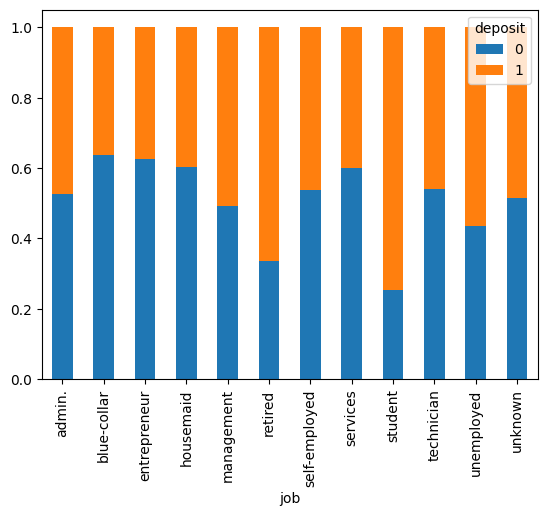

In [100]:
df_3.groupby('job')['deposit'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

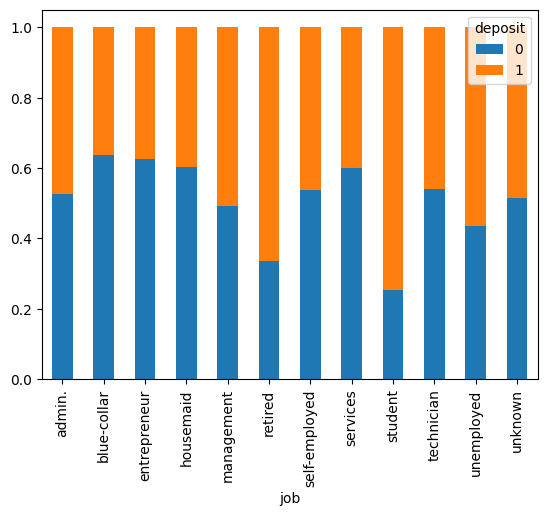

From the above plot, professions with similar deposit behavior to technicians could serve as substitutes for it, namely `admin` and `self-employed` appear to have a distribution similar to technicians.
  
Using these two professions could be a reasonable substitute for technicians in models requiring a similar distribution pattern.

## Objective 2:

### Q10-12. 

`[8]`

In [22]:
%pip install torch torchvision

^C
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB 6.5 MB/s eta 0:00:32
   ---------------------------------------- 0.8/203.1 MB 8.1 MB/s eta 0:00:26
   ---------------------------------------- 1.2/203.1 MB 8.7 MB/s eta 0:00:24
   ---------------------------------------- 1.7/203.1 MB 9.8 MB/s eta 0:00:21
   ---------------------------------------- 2.1/203.1 MB 9.7 MB/s eta 0:00:21
    --------------------------------------- 2.5/203.1 MB 9.5 MB/s eta 0:00:22
    --------------------------------------- 3.0/203.1 MB 9.7 MB/s eta 0:00:21
    --------------------------------------- 3.4/203.1 MB 9.5 MB/s eta 0:00:22
    --------------------------------------- 3.9/203.1 MB 9.6 MB/s eta 0:00:21
    -----------------------------------

In [103]:
# Step 1: Data transformations (Resize and normalize)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [105]:
# Step 2: Load the dataset
data_dir = 'hymenoptera_data'  # Replace with the path to your dataset

image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']
}

# Step 3: DataLoaders for the datasets
dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# Check the dataset classes (should be ants and bees)
class_names = image_datasets['train'].classes
print(class_names)

['ants', 'bees']


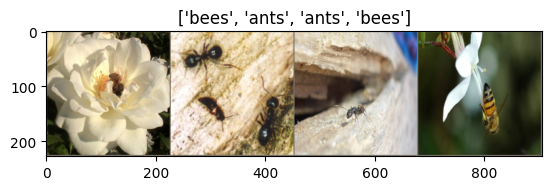

In [107]:
def imshow(inp, title=None):
    """
    Parameters:
        inp (torch.Tensor): Input image tensor
        title (str): Title for the image

    Returns:
        None
    """
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [109]:
# Load the pre-trained ResNet-18 model
model_conv = models.resnet18(weights='IMAGENET1K_V1')

# Step 4: Freeze the parameters so they are not updated during training
for param in model_conv.parameters():
    param.requires_grad = False

# Remove the final layer (fully connected) to use ResNet18 as a feature extractor
# The layer right before the final layer has a 512-dimensional output for ResNet18
model_conv = nn.Sequential(*list(model_conv.children())[:-1])

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_conv = model_conv.to(device)

In [110]:
print(device)

cpu


In [ ]:
def extract_features(model, dataloader, device):
    """
    Extracts 512-dimensional ResNet18 features for a given input image tensor.
    
    Parameters:
        model (torch.nn.Module): Pre-trained ResNet18 model.
        dataloader (torch.utils.data.DataLoader): DataLoader object for the dataset.
        device (torch.device): Device to run the model on (CPU or GPU).
    
    Returns:
        tuple: A tuple containing:
            - features_array (numpy.ndarray): Extracted features with shape (N, 512).
            - labels_array (numpy.ndarray): Corresponding labels for the features.
    """

    model.eval()  # Set the model to evaluation mode
    features_list = []
    labels_list = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in dataloader:
            inputs = inputs.to(device)

            # Forward pass: Get the features
            features = model(inputs)
            features = features.view(features.size(0), -1)  # Flatten the features to Nx512

            # Move features to CPU and convert to numpy for storage
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    # Concatenate all the features and labels into arrays
    features_array = np.concatenate(features_list, axis=0)  # Final array shape Nx512
    labels_array = np.concatenate(labels_list, axis=0)      # Labels corresponding to each feature
    return features_array, labels_array

# `[9]` Modified the code from the original source by adding the `device` parameter and moving the model to the device
# and also added the labels array to the return value for further analysis

In [112]:
# Extract features for the training dataset
train_features, train_labels = extract_features(model_conv, dataloaders['train'], device)

# Check the shape of the output features (should be Nx512)
print(f"Train Features Shape: {train_features.shape}")  # Expected (N, 512)
print(f"Train Labels Shape: {train_labels.shape}")

Train Features Shape: (244, 512)
Train Labels Shape: (244,)


In [113]:
# Now extract features for the validation set as well
val_features, val_labels = extract_features(model_conv, dataloaders['val'], device)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)

In [114]:
# Train L2-regularized logistic regression
log_reg = LogisticRegression(penalty='l2', max_iter=1000)

# Fit the model
log_reg.fit(train_features, train_labels)

# Predict on validation set
log_reg_pred = log_reg.predict(val_features)

# Evaluate Logistic Regression
log_reg_acc = accuracy_score(val_labels, log_reg_pred)
log_reg_f1 = f1_score(val_labels, log_reg_pred, average='weighted')
log_reg_auc = roc_auc_score(val_labels, log_reg_pred)

print("Logistic Regression - Accuracy:", log_reg_acc)
print("Logistic Regression - F1 Score:", log_reg_f1)
print("Logistic Regression - AUC-ROC Score:", log_reg_auc)

Logistic Regression - Accuracy: 0.9411764705882353
Logistic Regression - F1 Score: 0.9412772605293991
Logistic Regression - AUC-ROC Score: 0.9435456110154905


In [115]:
# Set up Random Forest and grid search
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None]  # Maximum depth of the tree
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search_rf.fit(train_features, train_labels)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Predict on validation set using the best random forest model
rf_pred = best_rf.predict(val_features)

# Evaluate Random Forest
rf_acc = accuracy_score(val_labels, rf_pred)
rf_f1 = f1_score(val_labels, rf_pred, average='weighted')

print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Accuracy:", rf_acc)
print("Random Forest - F1 Score:", rf_f1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest - Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest - Accuracy: 0.9084967320261438
Random Forest - F1 Score: 0.9086532548930166


Results Summary:


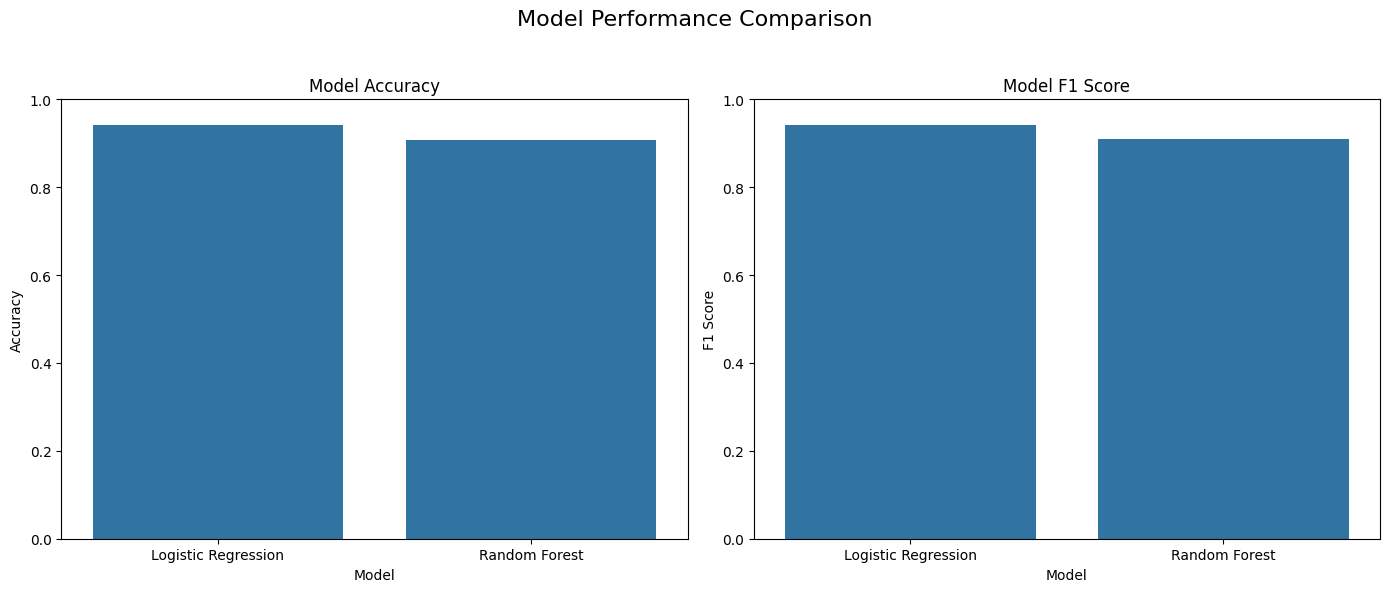

In [119]:
print("Results Summary:")

# Visualize the results using bar plots
results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_reg_acc, rf_acc],
    'F1 Score': [log_reg_f1, rf_f1]
}

results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0])
axes[0].set_title('Model Accuracy')
axes[0].set_ylim(0, 1)

sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[1])
axes[1].set_title('Model F1 Score')
axes[1].set_ylim(0, 1)

plt.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the above analysis, both Logistic Regression and Random Forest models performed well using ResNet18 features, with Logistic Regression showing a slight edge. This helps us see the effectiveness of using pre-trained deep networks as feature extractors, allowing simpler models (like LogReg) to perform well without complex training processes. 

More specifically, ResNet18 likely captured meaningful patterns and representations from the images, which both models could leverage well and also made them robust which we can see from the F1 scores

Hence, this approach is usually highly recommended for projects where computational resources are limited or rapid deployment is required since it avoids the need for end-to-end training.

`[7]`

## References

A list of the references that I have used for the purpose of this assignment:
1. [ChatGPT] Explain how to balance class distribution in a dataset and provide a code example in Python.
2. [ChatGPT] Given the correlation matrix and class distribution, how can we tell which variables are useful?
3. [ChatGPT] Review the summary statistics and identify any variables that might be unreliable or noisy. 
4. [ChatGPT] Check feature importance for each model to see if the same variables are important for each model.
5. [RFECV - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)
6. [ChatGPT] Write a customised code for RFECV for RBF SVC and MLPClassifier
7. [ChatGPT] Give insights on the bar chart comparing accuracy and F1 scores for Logistic Regression and Random Forest models using ResNet18 features. Explain why their performance is similar.
8. [PyTorch Tutorial on Transfer Learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
9. [ChatGPT] Write a function that outputs ResNet18 features for a given input image. 
10. Modifications in Objective 2, Q10 on discussion with Aman Verma, `22B3929`.